In [2]:
import pandas as pd


csv_path = "C:/Users/91738/Downloads/archive (15)/KAGGLE/DATASET-balanced.csv" 
df = pd.read_csv(csv_path)

# Display the first few rows
print(df.head())


print("\nColumn Names:", df.columns)


   chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.338055  0.027948        2842.948867         4322.916759  6570.586186   
1     0.443766  0.037838        2336.129597         3445.777044  3764.949874   
2     0.302528  0.056578        2692.988386         2861.133180  4716.610271   
3     0.319933  0.031504        2241.665382         3503.766175  3798.641521   
4     0.420055  0.016158        2526.069123         3102.659519  5025.077899   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.041050 -462.169586   90.311272  19.073769  24.046888  ...   
1            0.047730 -409.413422  120.348808  -7.161531   5.114784  ...   
2            0.080342 -318.996033  120.490273 -24.625771  23.891073  ...   
3            0.047180 -404.636749  136.320908   2.308172  -3.907071  ...   
4            0.051905 -410.497925  152.731400 -18.266771  51.993462  ...   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17 

In [3]:
import librosa
import numpy as np

def extract_features(file_path, sr=22050, n_mfcc=13):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=sr)

        # Feature 1: MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc = np.mean(mfcc.T, axis=0)

        # Feature 2: Mel-Spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec_db = np.mean(mel_spec_db.T, axis=0)

        # Feature 3: Chroma STFT
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma = np.mean(chroma.T, axis=0)

        # Feature 4: Spectral Contrast
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        contrast = np.mean(contrast.T, axis=0)

        # Feature 5: Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y)
        zcr = np.mean(zcr.T, axis=0)

        # Feature 6: Root Mean Square Energy
        rmse = librosa.feature.rms(y=y)
        rmse = np.mean(rmse.T, axis=0)

        # Combine all features into one array
        features = np.hstack([mfcc, mel_spec_db, chroma, contrast, zcr, rmse])
        return features

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [4]:
import pandas as pd

# Load the CSV file
csv_path = "C:/Users/91738/Downloads/archive (15)/KAGGLE/DATASET-balanced.csv"
df = pd.read_csv(csv_path)

# Print first few rows & column names
print("Column Names:", df.columns)
print(df.head()) 


Column Names: Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'LABEL'],
      dtype='object')
   chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.338055  0.027948        2842.948867         4322.916759  6570.586186   
1     0.443766  0.037838        2336.129597         3445.777044  3764.949874   
2     0.302528  0.056578        2692.988386         2861.133180  4716.610271   
3     0.319933  0.031504        2241.665382         3503.766175  3798.641521   
4     0.420055  0.016158        2526.069123         3102.659519  5025.077899   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.041050 -462.169586   90.311272  19.073769  24.046888  ... 

In [5]:
import os
import pandas as pd

# Define dataset directories
dataset_dir = "C:/Users/91738/Downloads/archive (15)/KAGGLE"
real_dir = os.path.join(dataset_dir, "REAL")
fake_dir = os.path.join(dataset_dir, "FAKE")


real_files = [os.path.join("REAL", f) for f in os.listdir(real_dir) if f.endswith(".wav")]
fake_files = [os.path.join("FAKE", f) for f in os.listdir(fake_dir) if f.endswith(".wav")]


data = {"file_path": real_files + fake_files, "label": [1] * len(real_files) + [0] * len(fake_files)}
df = pd.DataFrame(data)


csv_output_path = os.path.join(dataset_dir, "dataset_with_paths.csv")
df.to_csv(csv_output_path, index=False)

print(f"✅ CSV file created: {csv_output_path}")
print(df.head())


✅ CSV file created: C:/Users/91738/Downloads/archive (15)/KAGGLE\dataset_with_paths.csv
                  file_path  label
0   REAL\biden-original.wav      1
1   REAL\linus-original.wav      1
2  REAL\margot-original.wav      1
3    REAL\musk-original.wav      1
4   REAL\obama-original.wav      1


In [6]:
dataset_dir = "C:/Users/91738/Downloads/archive (15)/KAGGLE/"

# Load the new CSV with file paths
df = pd.read_csv(os.path.join(dataset_dir, "dataset_with_paths.csv"))

# Convert file paths to absolute paths
df["file_path"] = dataset_dir + df["file_path"]

print(df.head())


                                           file_path  label
0  C:/Users/91738/Downloads/archive (15)/KAGGLE/R...      1
1  C:/Users/91738/Downloads/archive (15)/KAGGLE/R...      1
2  C:/Users/91738/Downloads/archive (15)/KAGGLE/R...      1
3  C:/Users/91738/Downloads/archive (15)/KAGGLE/R...      1
4  C:/Users/91738/Downloads/archive (15)/KAGGLE/R...      1


In [9]:
import librosa
import numpy as np
import pandas as pd
import os

# Load the updated CSV file
dataset_dir = "C:/Users/91738/Downloads/archive (15)/KAGGLE/"
df = pd.read_csv(os.path.join(dataset_dir, "dataset_with_paths.csv"))

# Convert file paths to absolute paths
df["file_path"] = dataset_dir + df["file_path"]

# Function to extract Mel-Spectrogram & MFCC features
def extract_features(file_path, sr=22050, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=sr)

        # Extract Mel-Spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Extract MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        return mel_spec_db.mean(axis=1), mfcc.mean(axis=1)  # Take mean over time
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None

# Store features & labels
features = []
labels = []

# Process each file
for index, row in df.iterrows():
    file_path = row["file_path"]
    label = row["label"]  # 1 = Real, 0 = Fake

    mel_spec, mfcc = extract_features(file_path)
    
    if mel_spec is not None and mfcc is not None:
        feature_vector = np.hstack([mel_spec, mfcc])  # Combine both features
        features.append(feature_vector)
        labels.append(label)

# Convert to NumPy arrays
X = np.array(features)
y = np.array(labels)

# Save dataset
np.save("X.npy", X)
np.save("y.npy", y)

print(f"✅ Feature extraction complete! Saved {X.shape[0]} samples.")


✅ Feature extraction complete! Saved 64 samples.


In [8]:
import os

print("Current Working Directory:", os.getcwd())  # Shows where X.npy & y.npy are saved
print("Files in the directory:", os.listdir())  # Lists all saved files


Current Working Directory: C:\Users\91738
Files in the directory: [' Gui final.ipynb', '.anaconda', '.android', '.arduinoIDE', '.cache', '.conda', '.condarc', '.continuum', '.eclipse', '.gitconfig', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jdks', '.jupyter', '.keras', '.m2', '.matplotlib', '.modustoolbox', '.p2', '.packettracer', '.vscode', '.Xilinx', 'anaconda3', 'AppData', 'Application Data', 'best_hybrid_cnn_bilstm_optimized.h5', 'best_hybrid_model.h5', 'career.ipynb', 'careerlast.pkl', 'Cisco Packet Tracer 8.2.1', 'Cisco Packet Tracer 8.2.2', 'cloned voice 1.ipynb', 'CNN model handwritten digit recognition.ipynb', 'cnn model training final.ipynb', 'cnn_model.h5', 'Contacts', 'Cookies', 'daa.ipynb', 'data', 'dct.ipynb', 'deepfake.ipynb', 'deepfake_voice_model.h5', 'deepfake_voice_model.keras', 'descript.ipynb', 'Desktop', 'Documents', 'Downloads', 'dspreprocessing.ipynb', 'eclipse', 'eclipse-workspace', 'EDAI6.ipynb', 'EDAI6NEW.ipynb', 'edi gui final .ipynb', 'edi project.ipyn

In [10]:
import numpy as np

# Load extracted features
X = np.load("X.npy")
y = np.load("y.npy")

# Print dataset shape
print(f"Feature Matrix Shape: {X.shape}")  # (num_samples, num_features)
print(f"Label Vector Shape: {y.shape}")  # (num_samples,)


Feature Matrix Shape: (64, 141)
Label Vector Shape: (64,)


In [11]:
print("First Feature Vector:\n", X[0])  # Prints feature values of the first sample
print("First Label:", y[0])  # Prints whether it's real (1) or fake (0)


First Feature Vector:
 [ -67.12402    -60.979034   -52.426037   -45.42493    -44.578903
  -43.58884    -39.720078   -37.913345   -36.756985   -35.53374
  -36.981773   -39.965897   -42.686687   -44.195797   -42.893345
  -40.786953   -39.774105   -38.06495    -36.12486    -34.550125
  -34.51071    -34.02585    -34.077923   -36.06157    -37.459164
  -38.84013    -39.13087    -38.446144   -38.444378   -37.95864
  -37.22879    -36.749443   -36.671257   -37.770954   -38.36297
  -39.47002    -40.50756    -40.370277   -40.669147   -39.904858
  -40.087627   -39.685978   -39.097183   -38.872963   -39.063915
  -38.920544   -38.909878   -39.472466   -39.644463   -39.649902
  -39.279602   -39.10212    -39.27714    -39.704243   -40.410934
  -41.330772   -41.258556   -41.40106    -42.01489    -42.64584
  -43.156914   -43.485867   -43.86622    -44.2211     -44.603333
  -45.09604    -45.882717   -46.27005    -46.54873    -46.36343
  -46.310104   -46.564552   -47.546265   -49.209568   -50.552563
  -51.3

In [12]:
pip install tensorflow


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
import numpy as np

# Load extracted features
X = np.load("X.npy")
y = np.load("y.npy")

X = X.reshape(X.shape[0], X.shape[1], 1)  

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
lstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation="tanh")),  
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=False, activation="tanh")),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # Binary classification
])

lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Save model
lstm_model.save("lstm_model.h5")
print("✅ LSTM-only model training complete & saved!")


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 639ms/step - accuracy: 0.6215 - loss: 0.6651 - val_accuracy: 0.8462 - val_loss: 0.4634
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.8695 - loss: 0.4243 - val_accuracy: 0.8462 - val_loss: 0.4680
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8903 - loss: 0.3438 - val_accuracy: 0.8462 - val_loss: 0.5187
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8903 - loss: 0.3617 - val_accuracy: 0.8462 - val_loss: 0.5212
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9007 - loss: 0.3468 - val_accuracy: 0.8462 - val_loss: 0.4899
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9007 - loss: 0.3374 - val_accuracy: 0.8462 - val_loss: 0.4594
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8799 - loss: 0.3494 - val_accuracy: 0.8462 - val_loss: 0.4449
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.9007 - loss: 0.3321 - val_accuracy: 0.8462 - val_loss:

✅ LSTM-only model training complete & saved!


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np

# Load extracted features
X = np.load("X.npy")
y = np.load("y.npy")

X = X.reshape(X.shape[0], X.shape[1], 1)  

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation="relu", input_shape=(X.shape[1], 1)), 
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation="relu"),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # Binary classification
])

cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history_cnn = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Save model
cnn_model.save("cnn_model.h5")
print("✅ CNN-only model training complete & saved!")


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.7755 - loss: 1.2685 - val_accuracy: 0.8462 - val_loss: 5.0766
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8772 - loss: 3.4115 - val_accuracy: 0.8462 - val_loss: 1.8374
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8068 - loss: 1.8939 - val_accuracy: 0.8462 - val_loss: 2.2043
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8772 - loss: 1.8998 - val_accuracy: 0.8462 - val_loss: 0.3929
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7598 - loss: 1.3892 - val_accuracy: 0.8462 - val_loss: 0.4449
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7467 - loss: 1.0688 - val_accuracy: 0.8462 - val_loss: 0.8729
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8199 - loss: 0.9372 - val_accuracy: 0.8462 - val_loss: 0.5365
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7494 - loss: 0.7899 - val_accuracy: 0.8462 - val_loss: 0.2572

✅ CNN-only model training complete & saved!


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Add, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np

# Load extracted features
X = np.load("X.npy")
y = np.load("y.npy")

X = X.reshape(X.shape[0], X.shape[1], 1)  

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Residual Block
def residual_block(x, filters):
    shortcut = x
    x = Conv1D(filters, kernel_size=3, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(filters, kernel_size=3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])  # Residual connection
    x = ReLU()(x)
    return x

# Define ResNet model
inputs = Input(shape=(X.shape[1], 1))
x = Conv1D(64, kernel_size=3, activation="relu", padding="same")(inputs)
x = residual_block(x, 64)
x = residual_block(x, 64)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation="sigmoid")(x)

resnet_model = Model(inputs, outputs)
resnet_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history_resnet = resnet_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Save model
resnet_model.save("resnet_model.h5")
print("✅ ResNet model training complete & saved!")


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 360ms/step - accuracy: 0.4806 - loss: 7.1549 - val_accuracy: 0.8462 - val_loss: 42.5708
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8695 - loss: 27.7542 - val_accuracy: 0.8462 - val_loss: 43.8276
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9007 - loss: 22.9877 - val_accuracy: 0.8462 - val_loss: 36.1099
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8695 - loss: 25.5965 - val_accuracy: 0.8462 - val_loss: 19.6566
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8433 - loss: 15.8317 - val_accuracy: 0.8462 - val_loss: 3.8199
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.4257 - loss: 18.3360 - val_accuracy: 0.8462 - val_loss: 9.1771
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8433 - loss: 3.0507 - val_accuracy: 0.8462 - val_loss: 13.3387
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8772 - loss: 6.7605 - val_accuracy: 0.8462 - va

✅ ResNet model training complete & saved!


In [4]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
import numpy as np

# Load extracted features
X = np.load("X.npy")
y = np.load("y.npy")


X = X.reshape(X.shape[0], X.shape[1], 1) 

# Split into training & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Conv1D(64, kernel_size=3, activation="relu", input_shape=(X.shape[1], 1)), 
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, return_sequences=False)),  
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # Binary classification
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)


history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=60, batch_size=32)

# Save the trained model
model.save("deepfake_voice_model.h5")

print("✅ Model training complete & saved!")


Epoch 1/60


C:\Users\91738\anaconda3\anacondanew\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 489ms/step - accuracy: 0.5980 - loss: 0.6273 - val_accuracy: 0.8462 - val_loss: 0.4374
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8799 - loss: 0.3972 - val_accuracy: 0.8462 - val_loss: 0.4317
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8903 - loss: 0.3345 - val_accuracy: 0.8462 - val_loss: 0.4929
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8695 - loss: 0.4579 - val_accuracy: 0.8462 - val_loss: 0.4758
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8903 - loss: 0.3577 - val_accuracy: 0.8462 - val_loss: 0.4670
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8903 - loss: 0.4173 - val_accuracy: 0.8462 - val_loss: 0.4531
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8799 - loss: 0.3817 - val_accuracy: 0.8462 - val_loss: 0.4393
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8695 - loss: 0.3787 - val_accuracy: 0.8462 - val_loss: 0.4257
Epoch 9/60

✅ Model training complete & saved!


In [5]:
import tensorflow as tf

# Load the old HDF5 model
model = tf.keras.models.load_model("deepfake_voice_model.h5")

# Save it in the new `.keras` format
model.save("deepfake_voice_model.keras")


In [6]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("deepfake_voice_model.keras")

# ✅ Fix: Recompile model with metrics
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print("✅ Model loaded and compiled successfully!")


✅ Model loaded and compiled successfully!


In [7]:
# Evaluate model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step - accuracy: 1.0000 - loss: 0.0676
✅ Model Accuracy: 100.00%


In [9]:
history_cnn = cnn_model.fit(X_train, y_train, 
                            epochs=20, 
                            validation_data=(X_val, y_val))
history_lstm = lstm_model.fit(X_train, y_train, 
                              epochs=20, 
                              validation_data=(X_val, y_val))

history_resnet = resnet_model.fit(X_train, y_train, 
                                  epochs=20, 
                                  validation_data=(X_val, y_val))

history = model.fit(X_train, y_train, 
                                          epochs=20, 
                                          validation_data=(X_val, y_val))


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8695 - loss: 0.3596 - val_accuracy: 0.8462 - val_loss: 0.2930
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8826 - loss: 0.3606 - val_accuracy: 0.8462 - val_loss: 0.3269
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8903 - loss: 0.2939 - val_accuracy: 0.8462 - val_loss: 0.3238
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8930 - loss: 0.3101 - val_accuracy: 0.8462 - val_loss: 0.2841
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8695 - loss: 0.3393 - val_accuracy: 0.8462 - val_loss: 0.2797
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9034 - loss: 0.2786 - val_accuracy: 0.8462 - val_loss: 0.3057
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8799 - loss: 0.3072 - val_accuracy: 0.8462 - val_loss: 0.2713
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8826 - loss: 0.3513 - val_accuracy: 0.9231 - val_loss: 0.2586

NameError: name 'model' is not defined

In [16]:
import pickle
with open('history_cnn.pkl', 'wb') as f:
    pickle.dump(history.history, f)


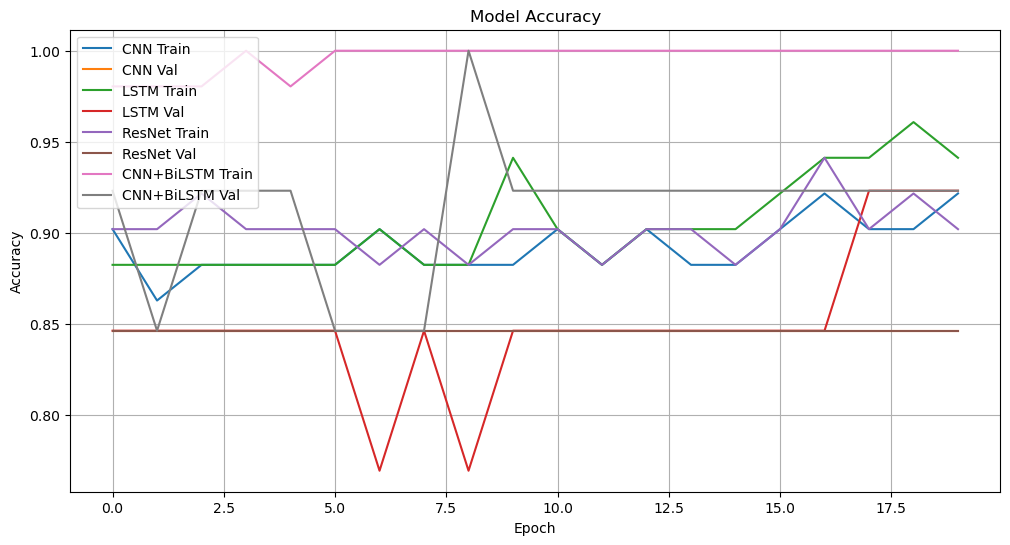

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['accuracy'], label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val')

plt.plot(history_lstm.history['accuracy'], label='LSTM Train')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val')

plt.plot(history_resnet.history['accuracy'], label='ResNet Train')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet Val')

plt.plot(history.history['accuracy'], label='CNN+BiLSTM Train')
plt.plot(history.history['val_accuracy'], label='CNN+BiLSTM Val')

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


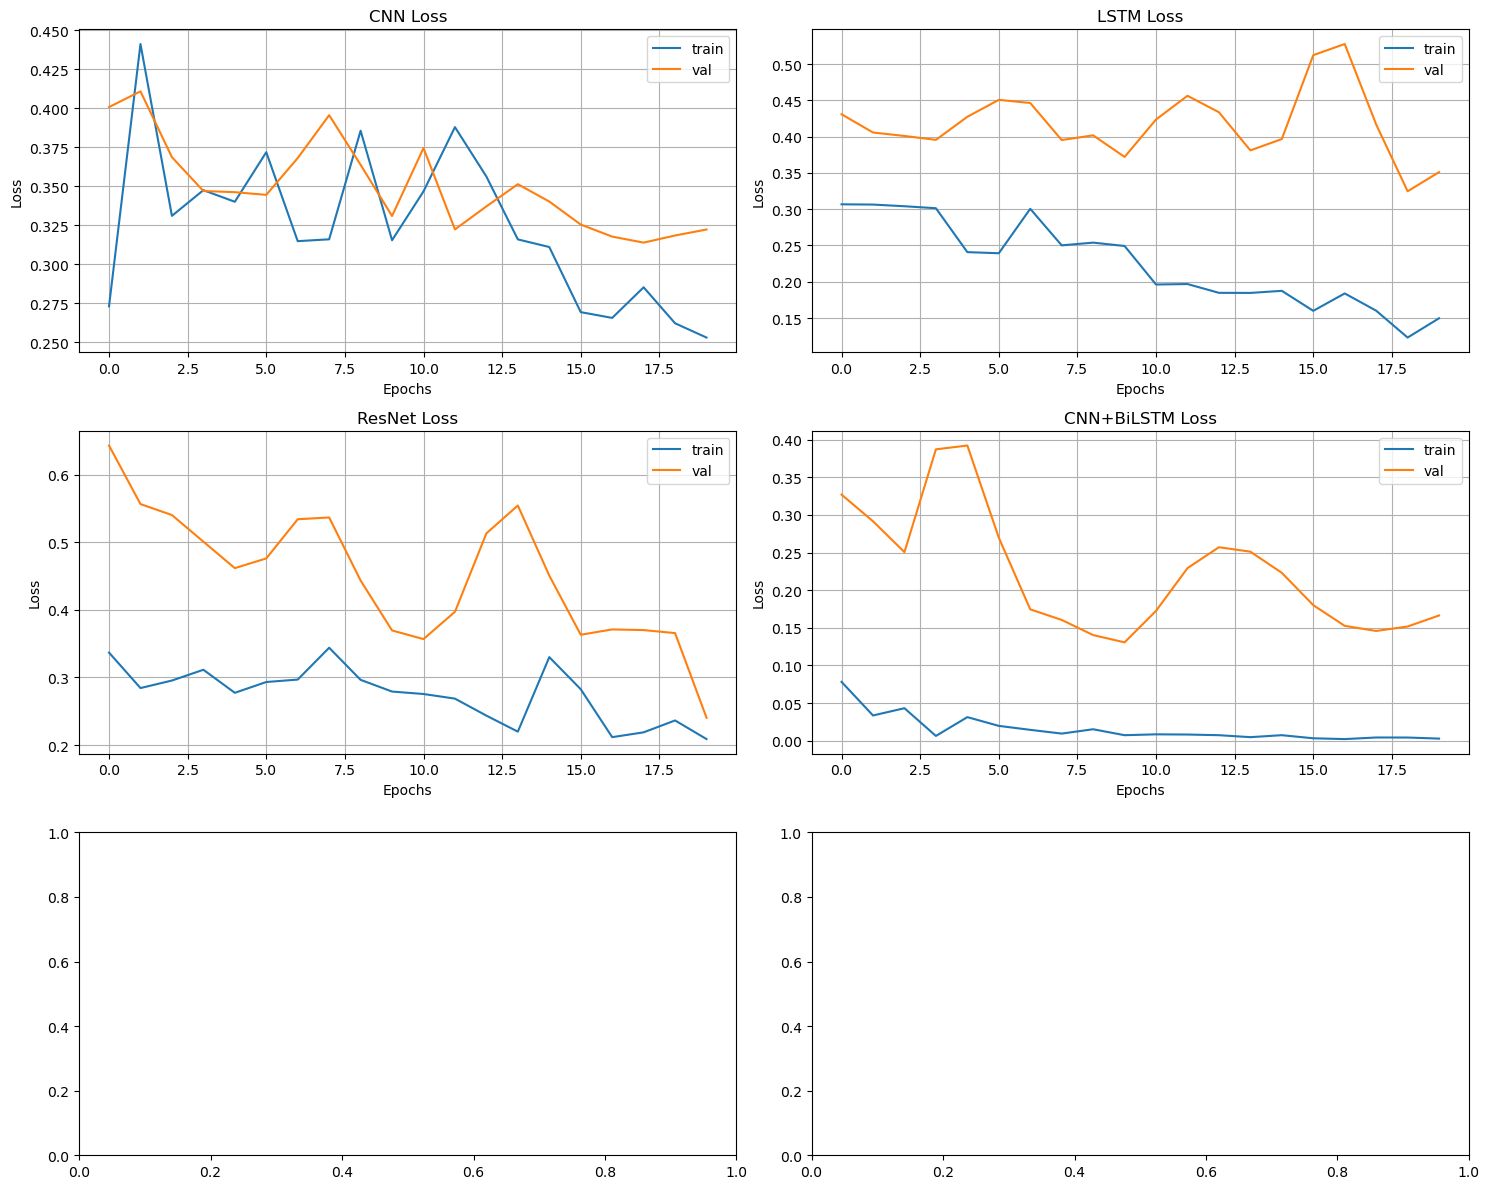

In [19]:
import matplotlib.pyplot as plt

# Example list of histories (replace these with your actual ones)
histories = [history_cnn, history_lstm, history_resnet, 
             history]

model_names = ['CNN', 'LSTM', 'ResNet', 
               'CNN+BiLSTM']

# Setup subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()  # flatten the 3x3 array into 1D for easy indexing

for i, history in enumerate(histories):
    ax = axes[i]
    ax.plot(history.history['loss'], label='train')
    ax.plot(history.history['val_loss'], label='val')
    ax.set_title(f'{model_names[i]} Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [1]:
pip install librosa tensorflow numpy


Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import librosa
from tensorflow.keras.models import load_model
import os

# Load the trained model
model = load_model("deepfake_voice_model.h5", compile=False)


# Parameters
SAMPLE_RATE = 22050
DURATION = 1  # seconds
N_MFCC = 13

def preprocess_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
    
    # Normalize audio
    y = librosa.util.normalize(y)

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)

    # Ensure consistent shape (pad if too short)
    if mfcc.shape[1] < 300:
        pad_width = 300 - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :300]  # Crop if too long

    # Reshape for model input (1, 13, 300)
    mfcc = mfcc[np.newaxis, :, :]

    return mfcc

def predict(file_path):
    features = preprocess_audio(file_path)
    prediction = model.predict(features)[0][0]  # Output is probability
    label = "FAKE" if prediction >= 0.5 else "REAL"
    confidence = prediction if label == "FAKE" else 1 - prediction
    print(f"Prediction: {label} (Confidence: {confidence*100:.2f}%)")

# Test with a new audio file
if __name__ == "__main__":
    test_audio_path = input("Enter path to the audio file: ").strip()
    
    if os.path.exists(test_audio_path):
        predict(test_audio_path)
    else:
        print("File not found!")


Enter path to the audio file:  "C:\\Users\\91738\\Downloads\\archive (15)\\KAGGLE\\AUDIO\\FAKE\\ryan-to-obama.wav"


File not found!


In [16]:
import os
import numpy as np
import librosa
from tensorflow.keras.models import load_model

model = load_model("deepfake_voice_model.h5", compile=False)

SAMPLE_RATE = 22050
N_MFCC = 13

def preprocess_audio(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=1)
    y = librosa.util.normalize(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    if mfcc.shape[1] < 300:
        mfcc = np.pad(mfcc, ((0, 0), (0, 300 - mfcc.shape[1])), mode='constant')
    else:
        mfcc = mfcc[:, :300]
    mfcc = mfcc[np.newaxis, :, :]
    return mfcc

def predict(file_path):
    print("Checking file path:", file_path)
    if not os.path.exists(file_path):
        print("❌ File not found.")
        return
    features = preprocess_audio(file_path)
    prediction = model.predict(features)[0][0]
    label = "FAKE" if prediction >= 0.5 else "REAL"
    confidence = prediction if label == "FAKE" else 1 - prediction
    print(f"✅ Prediction: {label} ({confidence*100:.2f}%)")

if __name__ == "__main__":
    # Use your actual file path
    file_path = r"C:/Users/91738/Downloads/archive (15)/KAGGLE/AUDIO/FAKE/ryan-to-obama.wav"
    predict(file_path)


Checking file path: C:/Users/91738/Downloads/archive (15)/KAGGLE/AUDIO/FAKE/ryan-to-obama.wav


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv1d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 13, 300)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 13, 300), dtype=float32)
  • training=False
  • mask=None

In [17]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 139, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 69, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,945 (324.00 KB)

 Trainable params: 82,945 (324.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
def preprocess_audio(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=1)
    y = librosa.util.normalize(y)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=1)  # 1 MFCC to match 1D feature input

    # Pad/crop to 300 time steps
    if mfcc.shape[1] < 300:
        mfcc = np.pad(mfcc, ((0, 0), (0, 300 - mfcc.shape[1])), mode='constant')
    else:
        mfcc = mfcc[:, :300]

    # Shape: (1, 300, 1)
    mfcc = mfcc.T  # Shape → (300, 1)
    mfcc = np.expand_dims(mfcc, axis=0)  # Shape → (1, 300, 1)

    return mfcc


In [19]:
features = preprocess_audio(file_path)
print("Shape for prediction:", features.shape)


Shape for prediction: (1, 300, 1)


In [35]:
if __name__ == "__main__":
    file_path = r"C:/Users/91738/Downloads/sandesh clone voice (1).wav"
    features = preprocess_audio(file_path)
    prediction = model.predict(features)[0][0]
    label = "REAL" if prediction >= 0.5 else "FAKE"
    confidence = prediction if label == "REAL" else 1 - prediction
    print(f"✅ Prediction: {label} ({confidence * 100:.2f}%)")  # ← Fixed indentation


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
✅ Prediction: FAKE (55.06%)


In [28]:
label_map = {'REAL': 0, 'FAKE': 1}


In [29]:
label = "FAKE" if prediction >= 0.5 else "REAL"


In [30]:
print(f"Raw model output: {prediction}")


Raw model output: 0.5293529033660889


In [31]:
label = "REAL" if prediction >= 0.5 else "FAKE"
confidence = prediction if label == "REAL" else 1 - prediction
